Spark imports

In [2]:
!pip install pyspark
!pip install sparkxgb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 20.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=e8f615599abacee98b781f1f8b3cb5e2fe0c8f351eb35f88fb89fb43622fc0c9
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 20.1 MB/s eta 0:00:00
  Created wheel for sparkxgb: filename=sparkxgb-0.1-py3-none-

In [3]:
## spark imports
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Standard python data analysis imports

In [5]:
## standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Jupyter visualization options

In [6]:
%matplotlib inline

#Not too sure the following 2 work. This is a TODO
sns.set_color_codes("pastel")
plt.rcParams["figure.figsize"] = [20, 8]

---
## Dataset information


These are the column names, as pulled from the Kaggle  [here](https://www.kaggle.com/djonafegnem/chicago-crime-data-analysis)

In [7]:
spark = SparkSession.builder.master('local[4]').appName('ml').getOrCreate()

---
## Reading the data

Using the Spark's csv reader to parse the files. It processes multiple files and returns a single data frame:

In [19]:
Crime_df = spark.read.csv('/content/drive/MyDrive/Dataset/Chicago_Crimes_2012_to_2017.csv', header=True, inferSchema=True)


In [20]:
# Caching this data frame as it's going to be read over and over again
Crime_df = Crime_df.cache()

In [21]:
Crime_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: integer (nullable = true)
 |-- Domestic: integer (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [11]:
Crime_df.show(n=3, truncate=False)

+---+--------+-----------+----------------+-------------------+----+----------------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------+-----------+------------+-----------------------------+
|_c0|ID      |Case Number|Date            |Block              |IUCR|Primary Type          |Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On      |Latitude   |Longitude   |Location                     |
+---+--------+-----------+----------------+-------------------+----+----------------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------+-----------+------------+-----------------------------+
|3  |10508693|HZ250496   |05-03-2016 23:40|013XX S SAWYER AVE |486 |BATTERY               |DOMESTIC BAT

In [28]:
Crime_df_pd = Crime_df.toPandas()

---
## Looking at the dataset

In [22]:
print(Crime_df.count())

1048575


In [23]:
Crime_df.columns

['_c0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

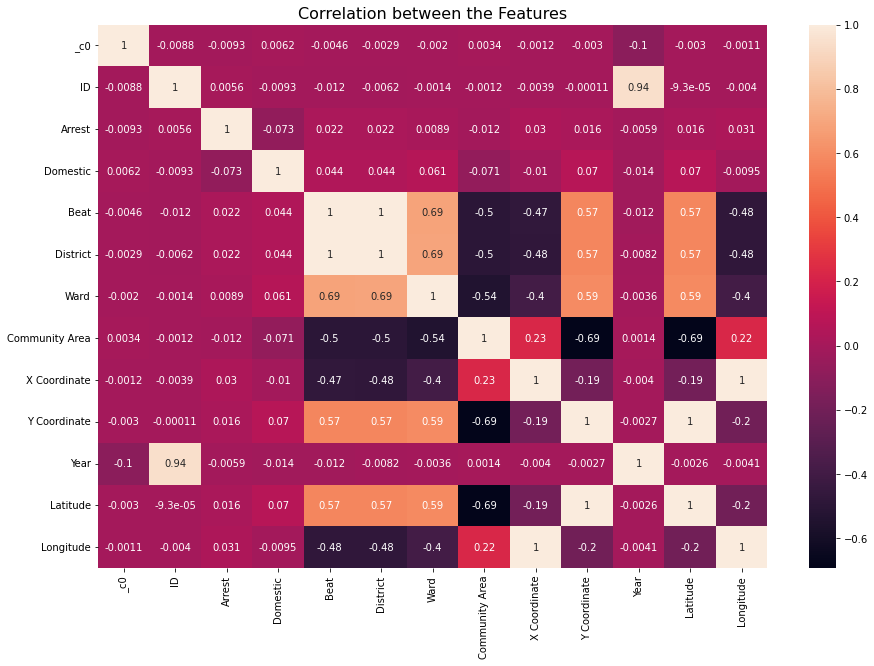

In [30]:
plt.figure(figsize = (15,10))
sns.heatmap(Crime_df_pd.corr(), annot = True )
plt.title('Correlation between the Features', size = 16)
plt.show()

In [25]:
num_rows1 = Crime_df.count()
num_cols1 = len(df.columns)
print("No. of Rows in Crime data frame:")
print(num_rows1)

print("No. of Columns in Crime data frame:")
print(num_cols1)

No. of Rows in Crime data frame:
1048575
No. of Columns in Crime data frame:
23


In [31]:
from pyspark.sql.functions import col,sum

In [32]:
null_counts = Crime_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in Crime_df.columns))

In [33]:
null_counts.show()

+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|_c0| ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  0|  0|          0|   0|    0|   0|           0|          0|                 648|     0|       0|   0|       1|  13|            40|       0|        8705|        8705|   0|         0|    8705|     8705|    8705|
+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------

In [35]:
clean_df = Crime_df.dropna()

In [36]:
null_counts2 = clean_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in clean_df.columns))

In [37]:
null_counts2.show()

+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|_c0| ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|  0|  0|          0|   0|    0|   0|           0|          0|                   0|     0|       0|   0|       0|   0|             0|       0|           0|           0|   0|         0|       0|        0|       0|
+---+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------

In [38]:
num_rows3 = clean_df.count()
num_cols3 = len(clean_df.columns)

In [39]:
print("No. of Rows in Final Crime data frame:")
print(num_rows3)

print("No. of Columns in Final Crime data frame:")
print(num_cols3)

No. of Rows in Final data frame:
1039231
No. of Columns in Final data frame:
23


In [41]:
  quartiles = clean_df.approxQuantile("X Coordinate", [0.25, 0.75], 0.01)
  iqr = quartiles[1] - quartiles[0]
  lower_bound = quartiles[0] - 1.5 * iqr
upper_bound = quartiles[1] + 1.5 * iqr
outliers = clean_df.filter((Crime_df["X Coordinate"] < lower_bound) | (Crime_df["X Coordinate"] > upper_bound))

In [42]:
outliers.show()

+------+--------+-----------+--------------------+-------------------+----+-----------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+-----------+------------+--------------------+
|   _c0|      ID|Case Number|                Date|              Block|IUCR|     Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|   Latitude|   Longitude|            Location|
+------+--------+-----------+--------------------+-------------------+----+-----------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+-----------+------------+--------------------+
|208606|10211597|   HY334821|    07-10-2015 06:00|   006XX W OHARE ST|2093|        NARCOTICS|FOUND SUSPECT NAR...|GOVERNM

In [43]:
outliers.count()

5112

In [47]:
outliers_cleaned_df = clean_df.subtract(outliers)


In [48]:
outliers_cleaned_df.count()

1034119

In [50]:
 quartiles1 = cleaned_df.approxQuantile("Y Coordinate", [0.25, 0.75], 0.01)
 iqr = quartiles[1] - quartiles[0]
 lower_bound = quartiles[0] - 1.5 * iqr
 upper_bound = quartiles[1] + 1.5 * iqr
 outliers1 = cleaned_df.filter((Crime_df["Y Coordinate"] < lower_bound) | (Crime_df["Y Coordinate"] > upper_bound))

In [51]:
outliers1.count()

1034119

In [52]:
cleaned_df.count()

1034119

In [79]:
cleaned_df

DataFrame[_c0: int, ID: int, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: int, Domestic: int, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string]

### Crime types

These are the top 20 most frequent crime types:

In [54]:
crime_type_counts.show(truncate=False)

+--------------------------------+------+
|primary type                    |count |
+--------------------------------+------+
|THEFT                           |236724|
|BATTERY                         |188826|
|NARCOTICS                       |110781|
|CRIMINAL DAMAGE                 |109031|
|ASSAULT                         |64049 |
|OTHER OFFENSE                   |61711 |
|BURGLARY                        |61458 |
|DECEPTIVE PRACTICE              |48697 |
|MOTOR VEHICLE THEFT             |43981 |
|ROBBERY                         |39737 |
|CRIMINAL TRESPASS               |27523 |
|WEAPONS VIOLATION               |12112 |
|PUBLIC PEACE VIOLATION          |10313 |
|OFFENSE INVOLVING CHILDREN      |7852  |
|PROSTITUTION                    |6324  |
|INTERFERENCE WITH PUBLIC OFFICER|4577  |
|CRIM SEXUAL ASSAULT             |4449  |
|SEX OFFENSE                     |3330  |
|GAMBLING                        |1853  |
|LIQUOR LAW VIOLATION            |1593  |
+--------------------------------+

I like doing some things by hand, but it's clear that here, one can obtain a Pandas data frame by calling:

``
crime_type_counts.toPandas()
``

In [55]:
counts_pddf = crime_type_counts.toPandas()

In [56]:
counts_pddf.head(10)

,primary type,count
0,THEFT,236724
1,BATTERY,188826
2,NARCOTICS,110781
3,CRIMINAL DAMAGE,109031
4,ASSAULT,64049
5,OTHER OFFENSE,61711
6,BURGLARY,61458
7,DECEPTIVE PRACTICE,48697
8,MOTOR VEHICLE THEFT,43981
9,ROBBERY,39737


[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'Crimes Record Count')]

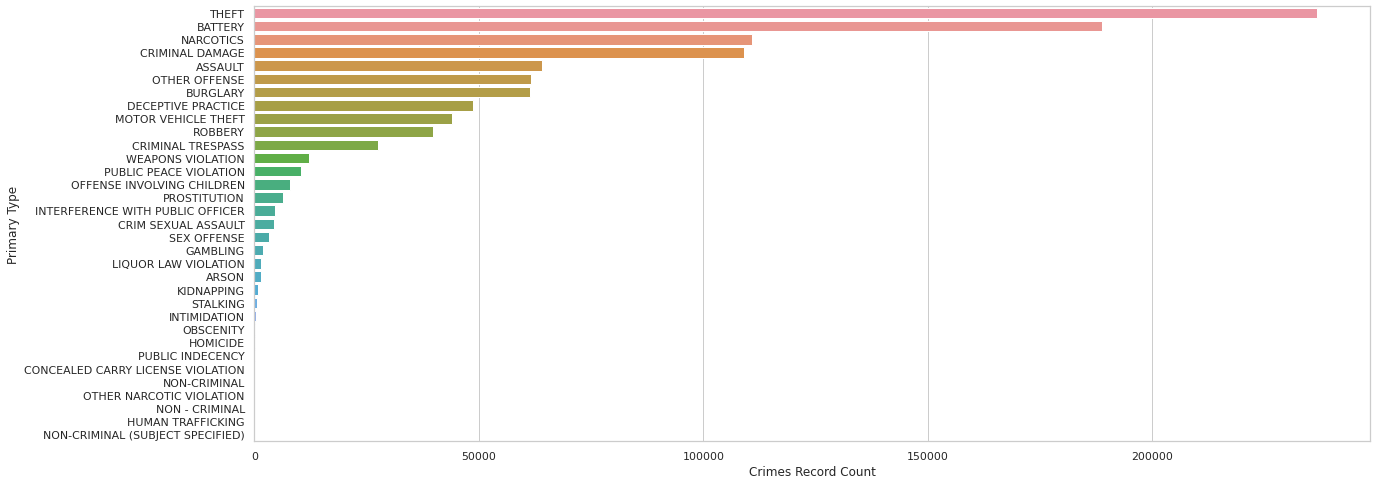

In [57]:
plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='count', y='primary type', data=counts_pddf)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Record Count")

### Recorded Date

In [58]:
import datetime
from pyspark.sql.functions import *

In [59]:
cleaned_df.select(min('date').alias('first_record_date'), max('date').alias('latest_record_date')).show(truncate=False)

+-----------------+----------------------+
|first_record_date|latest_record_date    |
+-----------------+----------------------+
|01-01-2012 00:00 |12/31/2015 08:00:00 AM|
+-----------------+----------------------+



So it seems that the dataset we're dealing with comprises records from **2001-01-01** to **2016-12-31**

---
Converting dates to a timestamp type. As seen in the schema output above, the `date` field is of `string` type, which won't be very helpful

The format specifier that seems valid for date like '02/23/2006 09:06:22 PM' is **`'MM/dd/yyyy hh:mm:ss a'`**

In [61]:
cleaned_df1 = cleaned_df.withColumn('date_time', to_timestamp('date', 'MM/dd/yyyy hh:mm:ss a'))\
       .withColumn('month', trunc('date_time', 'YYYY')) #adding a month column to be able to view stats on a monthly basis

In [62]:
cleaned_df1.select(['date','date_time', 'month'])\
  .show(n=2, truncate=False)

+----------------------+-------------------+----------+
|date                  |date_time          |month     |
+----------------------+-------------------+----------+
|04/28/2016 03:45:00 PM|2016-04-28 15:45:00|2016-01-01|
|02-03-2015 21:45      |null               |null      |
+----------------------+-------------------+----------+
only showing top 2 rows



### Primary type and arrest

In [63]:
# crime types and arrest over years:
type_arrest_date = cleaned_df1.groupBy(['arrest', 'month']).count().orderBy(['month', 'count'], ascending=["00", "11"])
print()
type_arrest_date.show(3, truncate=False)


+------+----------+------+
|arrest|month     |count |
+------+----------+------+
|0     |null      |115957|
|1     |null      |295498|
|0     |2012-01-01|53941 |
+------+----------+------+
only showing top 3 rows



In [64]:
# A small detour to learn/see how datetime works
import datetime

In [65]:
datetime.datetime.now()
datetime.datetime.strftime(datetime.datetime.now(), '%H')

'11'

In [66]:
# A pandas data frame of the collected dictionary version of the date-grouped DF above
type_arrest_pddf = type_arrest_date.toPandas()

Convert date/time values to Pandas type

*A lot of this is unnecessary, but that's called fiddling...*

In [67]:
type_arrest_pddf['month'] = pd.to_datetime(type_arrest_pddf['month'])


In [68]:
type_arrest_pddf['yearpd'] = type_arrest_pddf['month'].dt.year

In [69]:
type_arrest_pddf['arrest'] = type_arrest_pddf['arrest'].astype(int)
type_arrest_pddf.head(5)

,arrest,month,count,yearpd
0,0,NaT,115957,NaN
1,1,NaT,295498,NaN
2,0,2012-01-01,53941,2012.0
3,1,2012-01-01,146469,2012.0
4,0,2013-01-01,51010,2013.0


<ipython-input-70-bde58cc266fe>:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='both', axis='y')


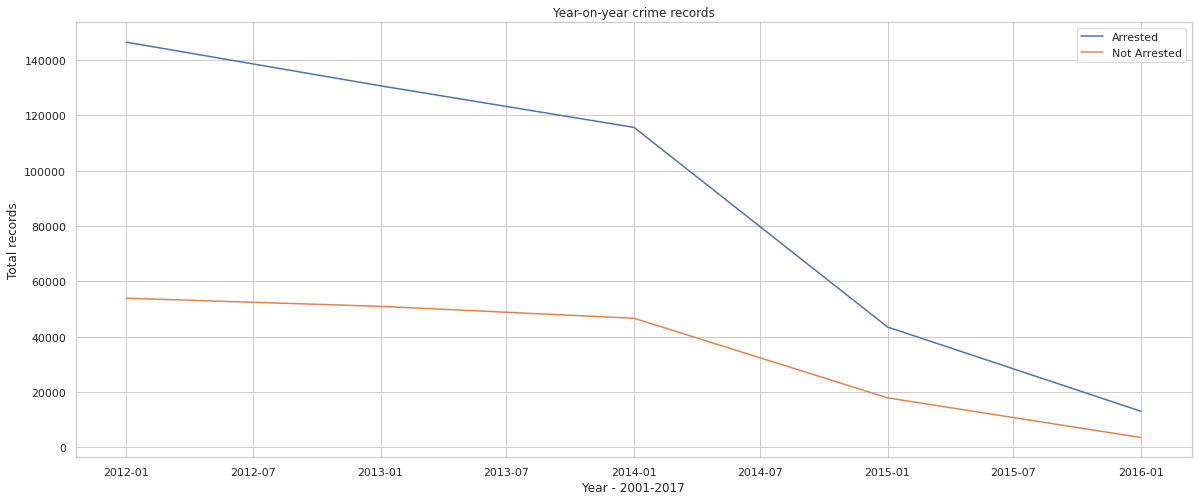

In [70]:
# Data for plotting
t = type_arrest_pddf['count'] - 20 # np.arange(0.0, 2.0, 0.01)
s = type_arrest_pddf['month']

arrested = type_arrest_pddf[type_arrest_pddf['arrest'] == True]
not_arrested = type_arrest_pddf[type_arrest_pddf['arrest'] == False]

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(arrested['month'], arrested['count'], label='Arrested')
ax.plot(not_arrested['month'], not_arrested['count'], label='Not Arrested')

ax.set(xlabel='Year - 2001-2017', ylabel='Total records',
       title='Year-on-year crime records')
ax.grid(b=True, which='both', axis='y')
ax.legend()

It looks like the relative distance between arrests and non-arrests has remained constant..

### What time of the day are ciminal the busiest?

In [71]:
# Extract the "hour" field from the date into a separate column called "hour"
df_hour = cleaned_df1.withColumn('hour', hour(cleaned_df1['date_time']))

In [72]:
# Derive a data frame with crime counts per hour of the day:
hourly_count = df_hour.groupBy(['primary type', 'hour']).count().cache()
hourly_total_count = hourly_count.groupBy('hour').sum('count')

In [73]:
hourly_count_pddf = pd_dataframe = hourly_total_count.select(hourly_total_count['hour'], hourly_total_count['sum(count)'].alias('count'))\
                                 .toPandas()


In [74]:
hourly_count_pddf = hourly_count_pddf.sort_values(by='hour')
print(hourly_count_pddf)

    hour   count
23   0.0   28900
3    1.0   18492
22   2.0   16198
7    3.0   13072
14   4.0    9665
9    5.0    8267
5    6.0   10031
17   7.0   14511
15   8.0   21239
12   9.0   28128
18  10.0   27937
20  11.0   29085
0   12.0   35517
4   13.0   30100
21  14.0   31915
11  15.0   34931
6   16.0   32826
13  17.0   32181
24  18.0   35059
10  19.0   36363
8   20.0   35101
19  21.0   33446
1   22.0   33206
16  23.0   26494
2    NaN  411455


Seems that 18-22 are the worst hours...

<ipython-input-75-ff4b5494a5d7>:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='both', axis='y')


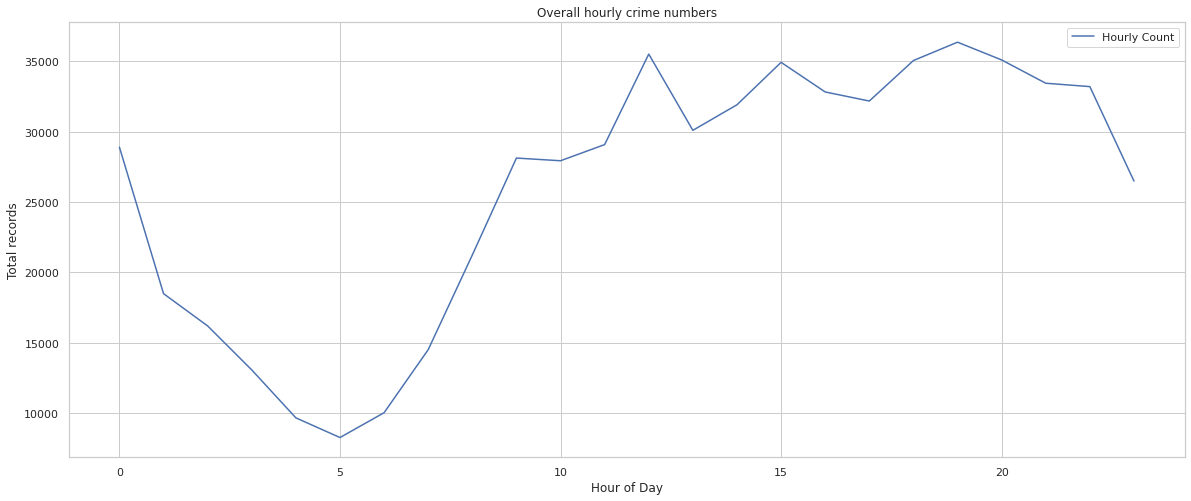

In [75]:
fig, ax = plt.subplots()
ax.plot(hourly_count_pddf['hour'], hourly_count_pddf['count'], label='Hourly Count')

ax.set(xlabel='Hour of Day', ylabel='Total records',
       title='Overall hourly crime numbers')
ax.grid(b=True, which='both', axis='y')
ax.legend()

### Types of locations with crime entries

In [76]:
# Number of types of location recorded in the dataset
cleaned_df1.select('location description').distinct().count()

108

What are the top 10 places where crime occurred?

In [77]:
cleaned_df1.groupBy(['location description']).count().orderBy('count', ascending=False).show(10)

+--------------------+------+
|location description| count|
+--------------------+------+
|              STREET|236022|
|           RESIDENCE|163354|
|           APARTMENT|130819|
|            SIDEWALK|121530|
|               OTHER| 38268|
|PARKING LOT/GARAG...| 29510|
|               ALLEY| 23270|
|RESIDENTIAL YARD ...| 21933|
|SCHOOL, PUBLIC, B...| 20899|
|  SMALL RETAIL STORE| 19842|
+--------------------+------+
only showing top 10 rows



In [ ]:
cleaned_df1

DataFrame[_c0: int, ID: int, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: string, Domestic: string, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string]

Can we see how the top crime locations are affected over the day?

In [78]:
#Being on the street and at home
street_home_hour = df_hour[cleaned_df1['location description'].isin(['STREET', 'RESIDENCE'])]


In [79]:
#a data frame with location descriptions and counts of recorded crimes, and hours...
street_home_hour_pddf = street_home_hour.toPandas()
street_home_hour_pddf = street_home_hour_pddf.sort_values(by='hour')

In [80]:
street_home_hour_pddf

,_c0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date_time,month,hour
336876,3217713,9740593,HX390924,08/17/2014 12:01:00 AM,041XX S EMERALD AVE,820,THEFT,$500 AND UNDER,STREET,1,...,1172000,1877054,2014,02-04-2016 06:33,41.818088,-87.644561,"(41.818087801, -87.644560568)",2014-08-17 00:01:00,2014-01-01,0.0
30054,2829732,9096153,HW240478,02/27/2013 12:36:00 AM,068XX S PAXTON AVE,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,1,...,1192060,1859948,2013,02-04-2016 06:33,41.770683,-87.571531,"(41.770683034, -87.571531227)",2013-02-27 00:36:00,2013-01-01,0.0
264339,3220078,9744552,HX394709,08/20/2014 12:30:00 AM,120XX S LAFAYETTE AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,1,...,1178091,1825149,2014,02-04-2016 06:33,41.675518,-87.623787,"(41.675518182, -87.623787063)",2014-08-20 00:30:00,2014-01-01,0.0
157360,3093114,9528463,HX182713,03/13/2014 12:01:00 AM,051XX N LONG AVE,820,THEFT,$500 AND UNDER,STREET,1,...,1139405,1933870,2014,02-04-2016 06:33,41.974653,-87.762745,"(41.974652569, -87.762744968)",2014-03-13 00:01:00,2014-01-01,0.0
30039,2760603,8981675,HW123058,01/19/2013 12:00:00 AM,075XX S LANGLEY AVE,820,THEFT,$500 AND UNDER,STREET,1,...,1182199,1855223,2013,02-04-2016 06:33,41.757951,-87.607823,"(41.757951154, -87.607823482)",2013-01-19 00:00:00,2013-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399359,2870950,9161010,HW305981,06-05-2013 13:30,007XX N HAMLIN AVE,460,BATTERY,SIMPLE,STREET,1,...,1150920,1904770,2013,02-04-2016 06:33,41.894582,-87.721164,"(41.894581495, -87.721164479)",NaT,None,NaN
399362,2987816,9347796,HW491456,10-10-2013 08:30,098XX S MARYLAND AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,1,...,1183638,1839695,2013,02-04-2016 06:33,41.715307,-87.603033,"(41.715307174, -87.603032664)",NaT,None,NaN
399366,3333851,10023164,HY212892,04-06-2015 21:30,058XX S MORGAN ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,0,...,1170636,1866288,2015,08/17/2015 03:03:40 PM,41.788575,-87.649878,"(41.78857464, -87.649878179)",NaT,None,NaN
399371,2926821,9249488,HW395287,08-06-2013 03:00,048XX S KARLOV AVE,810,THEFT,OVER $500,STREET,0,...,1149844,1872237,2013,02-04-2016 06:33,41.805328,-87.725961,"(41.805327857, -87.725961445)",NaT,None,NaN


In [ ]:
figure, axes = plt.subplots()
axes.plot(street_home_hour_pddf[street_home_hour_pddf['location_description'] == 'RESIDENCE']['hour'], 
          street_home_hour_pddf[street_home_hour_pddf['location_description'] == 'RESIDENCE']['count'],
         label='Crimes at home')

axes.plot(street_home_hour_pddf[street_home_hour_pddf['location_description'] == 'STREET']['hour'], 
          street_home_hour_pddf[street_home_hour_pddf['location_description'] == 'STREET']['count'],
         label='Crimes on the street')

axes.legend()
ax.grid(b=True, which='both', axis='y')

### Domestic crimes:

In [81]:
domestic_hour = pd.DataFrame(df_hour.groupBy(['domestic', 'hour']).count().orderBy('hour').rdd.map(lambda row: row.asDict()).collect())

In [82]:
dom = domestic_hour[domestic_hour['domestic'] == 'True']['count']
non_dom = domestic_hour[domestic_hour['domestic'] == 'False']['count']

either_dom = domestic_hour.groupby(by=['hour']).sum()['count']

dom_keys = domestic_hour[domestic_hour['domestic'] == 'False']['hour']

#### How do domestic crimes compare the other crimes?

### A closer look at crime date and time

The information given here indicates when the crime is perpetrated. The date/time field may be able to draw a meaningful trend that can be used to predict crime. However, I believe that this leads much more to external factors, such as policy changes, law inforcement-related factors, and so on.

It's much more likely that time-related features that are more closely relatable to crime occurence be better predictors than the date and time. I mean, knowing the month of the year, the day of the week, and the hour of the day that the crime occurred can enable better chances of predicting accurately than simply knowing "when" AD crimes occurred.

Adding predictors (so far fields) that read time information:

 * hour of day (already added the 'hour' field)
 * day of week
 * month of year
 * day in a range. Instead of using the entire date-time, we'll use a "day sequence" that is counted from 2001-01-01.

In [92]:
df_dates = df_hour.withColumn('week_day', dayofweek(df_hour['date_time']))\
                 .withColumn('year_month', month(df_hour['date_time']))\
                 .withColumn('month_day', dayofmonth(df_hour['date_time']))\
                 .withColumn('date_number', datediff(cleaned_df1['date_time'], to_date(lit('2001-01-01'), format='yyyy-MM-dd')))\
                 .cache()

In [93]:
df_dates.select(['date', 'month', 'hour', 'week_day', 'year', 'year_month', 'month_day', 'date_number']).show(20, truncate=False)

+----------------------+----------+----+--------+----+----------+---------+-----------+
|date                  |month     |hour|week_day|year|year_month|month_day|date_number|
+----------------------+----------+----+--------+----+----------+---------+-----------+
|04/28/2016 03:45:00 PM|2016-01-01|15  |5       |2016|4         |28       |5596       |
|02-03-2015 21:45      |null      |null|null    |2015|null      |null     |null       |
|02/23/2015 03:00:00 PM|2015-01-01|15  |2       |2015|2         |23       |5166       |
|01-02-2012 19:08      |null      |null|null    |2012|null      |null     |null       |
|01-06-2012 03:00      |null      |null|null    |2012|null      |null     |null       |
|04/16/2012 01:33:00 PM|2012-01-01|13  |2       |2012|4         |16       |4123       |
|04/23/2012 02:00:00 AM|2012-01-01|2   |2       |2012|4         |23       |4130       |
|06/13/2012 10:00:00 PM|2012-01-01|22  |4       |2012|6         |13       |4181       |
|06/23/2012 03:43:00 PM|2012-01-

In [95]:
df_dates.tail(1)

[Row(_c0=3361331, ID=10071281, Case Number='HY259705', Date='05/13/2015 11:30:00 PM', Block='091XX S CARPENTER ST', IUCR='810', Primary Type='THEFT', Description='OVER $500', Location Description='RESIDENTIAL YARD (FRONT/BACK)', Arrest=1, Domestic=1, Beat=2222, District=22, Ward=21, Community Area=73, FBI Code='6', X Coordinate=1170922, Y Coordinate=1844206, Year=2015, Updated On='08/17/2015 03:03:40 PM', Latitude=41.72797256, Longitude=-87.64947316, Location='(41.727972558, -87.649473156)', date_time=datetime.datetime(2015, 5, 13, 23, 30), month=datetime.date(2015, 1, 1), hour=23, week_day=4, year_month=5, month_day=13, date_number=5245)]

## Day of week crime levels

It seems intriguing that the're little variance... But bad people are bad all week, aren't they...

In [96]:
week_day_crime_counts = df_dates.groupBy('week_day').count()

In [97]:
week_day_crime_counts_pddf = week_day_crime_counts.orderBy('week_day').toPandas()

<AxesSubplot:xlabel='week_day', ylabel='count'>

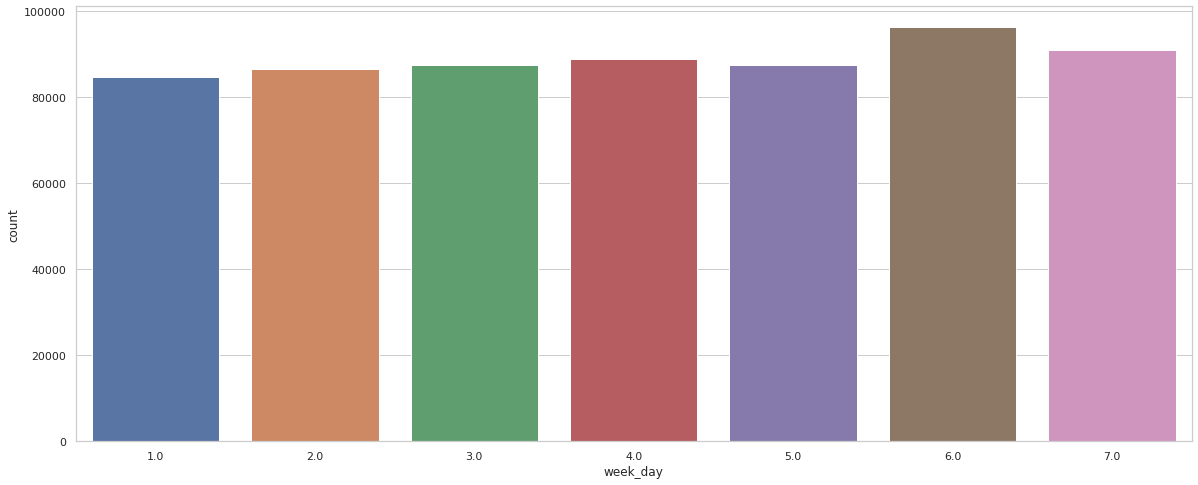

In [98]:
sns.barplot(data=week_day_crime_counts_pddf, x='week_day', y='count')

## Month of year

It seems that May-August are the busiest months for criminals... What could be the reason?

In [99]:
year_month_crime_counts = df_dates.groupBy('year_month').count()

In [100]:
year_month_crime_counts_pddf = year_month_crime_counts.orderBy('year_month').toPandas()


In [101]:
year_month_crime_counts_pddf

,year_month,count
0,NaN,411455
1,1.0,58453
2,2.0,45079
3,3.0,59861
4,4.0,57995
5,5.0,77205
6,6.0,50336
7,7.0,52124
8,8.0,50208
9,9.0,45532


<AxesSubplot:xlabel='year_month', ylabel='count'>

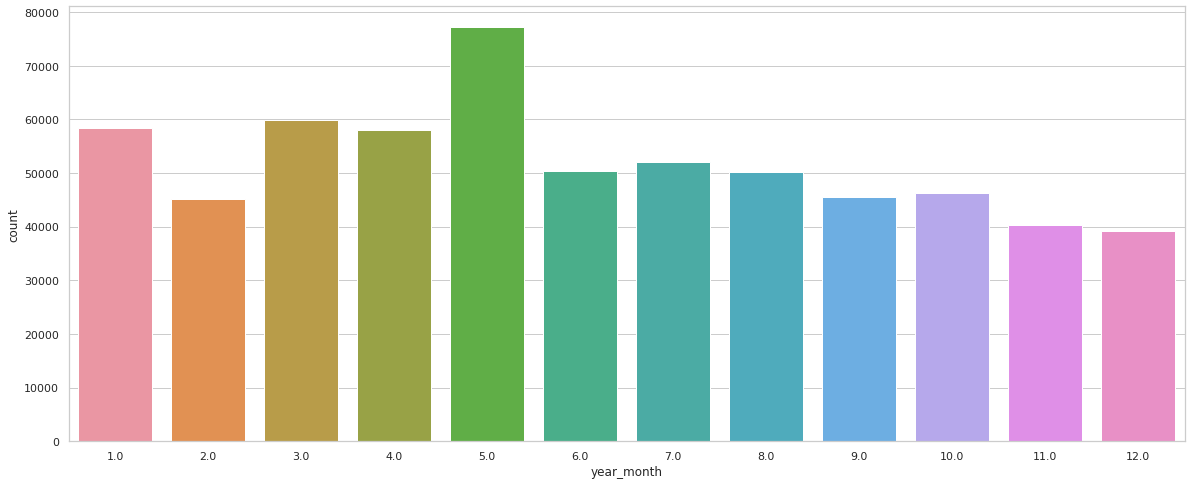

In [102]:
sns.barplot(data=year_month_crime_counts_pddf, y='count', x='year_month')

### Preparing model

In [103]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer


In [104]:
indexer = StringIndexer(inputCol= "Block", outputCol = "Block_cat")

In [105]:
indexed = indexer.fit(cleaned_df).transform(cleaned_df)

In [107]:
indexer = StringIndexer(inputCol= "Location", outputCol = "Location_index")

In [108]:
indexed = indexer.fit(indexed).transform(indexed)

In [109]:
indexer = StringIndexer(inputCol= "Description", outputCol = "Description_index")
indexed = indexer.fit(indexed).transform(indexed)

In [110]:
indexer = StringIndexer(inputCol= "Location Description", outputCol = "Location_Description_index")
indexed = indexer.fit(indexed).transform(indexed)

In [111]:
indexer = StringIndexer(inputCol= "Primary Type", outputCol = "Type_index")
indexed = indexer.fit(indexed).transform(indexed)

In [112]:
indexer = StringIndexer(inputCol= "Arrest", outputCol = "Arrest_index")
indexed = indexer.fit(indexed).transform(indexed)

In [131]:
indexer = StringIndexer(inputCol= "Domestic", outputCol = "Domestic_index")
indexed = indexer.fit(indexed).transform(indexed)

In [ ]:
'''''from pyspark.sql.functions import when, col



# convert the boolean column to a string column
num_Arrest = indexed.withColumn("Arrest1", when(col("Arrest") == True, "00").otherwise("11"))

# show the resulting DataFrame
num_Arrest.show()'''


'\'\'from pyspark.sql.functions import when, col\n\n\n\n# convert the boolean column to a string column\nnum_Arrest = indexed.withColumn("Arrest1", when(col("Arrest") == True, "00").otherwise("11"))\n\n# show the resulting DataFrame\nnum_Arrest.show()'

In [113]:
cleaned_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: integer (nullable = true)
 |-- Domestic: integer (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
#features =['Type_index','Block_index','Description_index','Location_Description_index','Location_index']

In [ ]:
#pdf=cleaned_df.toPandas()

In [132]:
from pyspark.ml.feature import VectorAssembler

In [133]:
assembler = VectorAssembler(inputCols=["Block_cat","Type_index","Location_index","Description_index","Location_Description_index","Domestic_index"],
                             outputCol='features')
data=assembler.transform(indexed)

In [117]:
data.select("features","Arrest_index").show(truncate=False)

+--------------------------------+------------+
|features                        |Arrest_index|
+--------------------------------+------------+
|[25436.0,3.0,306910.0,5.0,1.0]  |0.0         |
|[18369.0,1.0,221181.0,0.0,0.0]  |0.0         |
|[6741.0,3.0,45851.0,6.0,7.0]    |0.0         |
|[3067.0,9.0,17507.0,16.0,9.0]   |1.0         |
|[11084.0,0.0,125601.0,1.0,36.0] |0.0         |
|[17364.0,0.0,292259.0,1.0,0.0]  |0.0         |
|[1538.0,1.0,11428.0,2.0,0.0]    |1.0         |
|[1151.0,1.0,2160.0,0.0,0.0]     |0.0         |
|[41.0,0.0,8698.0,27.0,68.0]     |1.0         |
|[3367.0,0.0,1903.0,1.0,12.0]    |0.0         |
|[9886.0,2.0,80850.0,14.0,3.0]   |1.0         |
|[4109.0,9.0,8746.0,15.0,3.0]    |0.0         |
|[3785.0,1.0,55373.0,40.0,2.0]   |1.0         |
|[7597.0,3.0,3873.0,56.0,8.0]    |0.0         |
|[1584.0,4.0,1834.0,0.0,3.0]     |1.0         |
|[247.0,1.0,81.0,32.0,8.0]       |1.0         |
|[2927.0,5.0,138129.0,12.0,1.0]  |0.0         |
|[3391.0,7.0,3180.0,61.0,16.0]   |0.0   

In [138]:
data_drop = data.drop("_c0","Beat","District","Community Area","Ward","FBI Code","X Coordinate",	"ID",	"Case Number",	"Date"	,	"IUCR"	,"	X Coordinate",	"Y Coordinate"	,"Year",	"Updated On"	,"Latitude",	"Longitude",	"Location","date_time"	,"month"	,"hour")

In [136]:
indexed.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: integer (nullable = true)
 |-- Domestic: integer (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Block_cat: double (nullable = false)
 |-- Location_index

In [137]:
data_drop.show()

+--------------------+-------------------+--------------------+--------------------+------+--------+----+---------+--------------+-----------------+--------------------------+----------+------------+--------------+--------------------+
|               Block|       Primary Type|         Description|Location Description|Arrest|Domestic|Ward|Block_cat|Location_index|Description_index|Location_Description_index|Type_index|Arrest_index|Domestic_index|            features|
+--------------------+-------------------+--------------------+--------------------+------+--------+----+---------+--------------+-----------------+--------------------------+----------+------------+--------------+--------------------+
|075XX W ROSEDALE AVE|    CRIMINAL DAMAGE|          TO VEHICLE|           RESIDENCE|     1|       1|  41|  25436.0|      306910.0|              5.0|                       1.0|       3.0|         0.0|           0.0|[25436.0,3.0,3069...|
|     013XX E 48TH ST|            BATTERY|              

In [139]:
model_df = data_drop.select("features","Arrest_index")

In [119]:
model_df.show()

+--------------------+------------+
|            features|Arrest_index|
+--------------------+------------+
|[25436.0,3.0,3069...|         0.0|
|[18369.0,1.0,2211...|         0.0|
|[6741.0,3.0,45851...|         0.0|
|[3067.0,9.0,17507...|         1.0|
|[11084.0,0.0,1256...|         0.0|
|[17364.0,0.0,2922...|         0.0|
|[1538.0,1.0,11428...|         1.0|
|[1151.0,1.0,2160....|         0.0|
|[41.0,0.0,8698.0,...|         1.0|
|[3367.0,0.0,1903....|         0.0|
|[9886.0,2.0,80850...|         1.0|
|[4109.0,9.0,8746....|         0.0|
|[3785.0,1.0,55373...|         1.0|
|[7597.0,3.0,3873....|         0.0|
|[1584.0,4.0,1834....|         1.0|
|[247.0,1.0,81.0,3...|         1.0|
|[2927.0,5.0,13812...|         0.0|
|[3391.0,7.0,3180....|         0.0|
|[2283.0,0.0,1471....|         0.0|
|[10480.0,16.0,526...|         0.0|
+--------------------+------------+
only showing top 20 rows



In [140]:
traning_data,test_data=model_df.randomSplit([0.80,0.20],seed=0)

In [141]:
traning_data.count()

827009

In [142]:
print(test_data.count())

207110


In [143]:
from pyspark import SparkConf

conf = SparkConf().setAppName("MyApp").setMaster("local[*]")
spark = SparkSession.builder.config(conf=conf).getOrCreate()


In [144]:
from pyspark.ml.classification import LogisticRegression
import os

In [145]:
lr = LogisticRegression(labelCol = "Arrest_index")

In [146]:
model = lr.fit(traning_data)

In [147]:
predictions = model.transform(test_data)

In [148]:
predictions.show(5)

+--------------------+------------+--------------------+--------------------+----------+
|            features|Arrest_index|       rawPrediction|         probability|prediction|
+--------------------+------------+--------------------+--------------------+----------+
|[2.0,12.0,0.0,144...|         1.0|[-0.9571708299167...|[0.27744499927742...|       1.0|
|[3.0,0.0,43.0,9.0...|         0.0|[0.73418242784922...|[0.67572240572228...|       0.0|
|[3.0,1.0,1186.0,0...|         0.0|[0.73971160030915...|[0.67693278794776...|       0.0|
|[3.0,6.0,26.0,18....|         0.0|[0.92352890943215...|[0.71576059933710...|       0.0|
|[4.0,0.0,3833.0,1...|         0.0|[0.83928205912549...|[0.69831398781493...|       0.0|
+--------------------+------------+--------------------+--------------------+----------+
only showing top 5 rows



In [149]:
pred = predictions.select('prediction').toPandas()

In [150]:
actual = predictions.select('Arrest_index').toPandas()

In [151]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

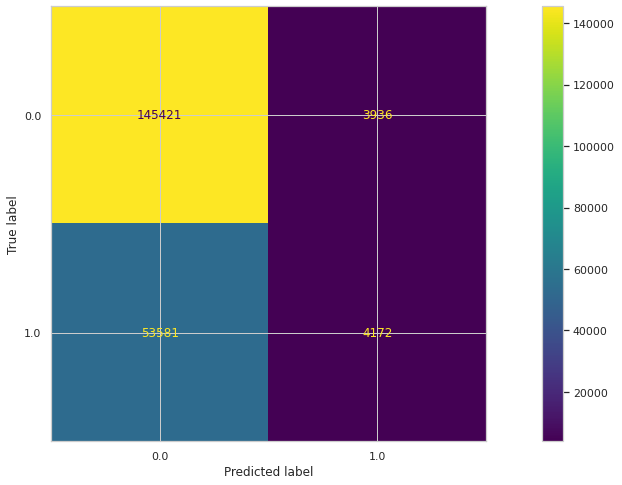

In [152]:
ConfusionMatrixDisplay.from_predictions(actual, pred)

In [153]:
accuracy_score(actual, pred)

0.7222876732171309

In [154]:
print(classification_report(actual, pred))

              precision    recall  f1-score   support

         0.0       0.73      0.97      0.83    149357
         1.0       0.51      0.07      0.13     57753

    accuracy                           0.72    207110
   macro avg       0.62      0.52      0.48    207110
weighted avg       0.67      0.72      0.64    207110



In [155]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [156]:
eval = MulticlassClassificationEvaluator(labelCol="Arrest_index", metricName= "accuracy")

In [157]:
print('Accuracy', eval.evaluate(predictions))

Accuracy 0.7222876732171309


# Random Forest

In [158]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql.functions import format_number, when, col, array, udf, lit
import pandas as pd
from pyspark.ml.feature import VectorAssembler, StringIndexer, VectorIndexer, IndexToString
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.sql.types import *
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

In [159]:
spark = SparkSession.builder.appName("Project - Chicago crime")\
.config("spark.some.config.option", "some-value")\
.config("spark.driver.memory", "8g")\
.config("spark.driver.cores", "3")\
.getOrCreate()

In [160]:
cleaned_df.head()

Row(_c0=798917, ID=10504097, Case Number='HZ244006', Date='04/28/2016 03:45:00 PM', Block='075XX W ROSEDALE AVE', IUCR='1320', Primary Type='CRIMINAL DAMAGE', Description='TO VEHICLE', Location Description='RESIDENCE', Arrest=1, Domestic=1, Beat=1612, District=16, Ward=41, Community Area=10, FBI Code='14', X Coordinate=1124825, Y Coordinate=1937769, Year=2016, Updated On='05/23/2016 03:48:54 PM', Latitude=41.9856058, Longitude=-87.8162747, Location='(41.9856058, -87.8162747)')

In [161]:
cleaned_df.groupby('Primary Type').count().show()

+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|OFFENSE INVOLVING...|  7586|
|            STALKING|   563|
|PUBLIC PEACE VIOL...| 10245|
|           OBSCENITY|   104|
|NON-CRIMINAL (SUB...|     3|
|               ARSON|  1448|
|            GAMBLING|  1853|
|   CRIMINAL TRESPASS| 27040|
|             ASSAULT| 63523|
|      NON - CRIMINAL|    20|
|LIQUOR LAW VIOLATION|  1588|
| MOTOR VEHICLE THEFT| 43632|
|               THEFT|233315|
|             BATTERY|187374|
|             ROBBERY| 39484|
|            HOMICIDE|    76|
|    PUBLIC INDECENCY|    45|
| CRIM SEXUAL ASSAULT|  4275|
|   HUMAN TRAFFICKING|     5|
|        INTIMIDATION|   467|
+--------------------+------+
only showing top 20 rows



In [162]:
cleaned_df = cleaned_df.withColumn("Primary Type", \
                               when((cleaned_df["Primary Type"] == 'CRIM SEXUAL ASSAULT') | \
                                    (cleaned_df["Primary Type"] == 'PROSTITUTION') ,'SEX OFFENSE').otherwise(cleaned_df['Primary Type']))
cleaned_df=cleaned_df.withColumn("Primary Type", \
                               when((cleaned_df["Primary Type"] == 'WEAPONS VIOLATION') | \
                                    (cleaned_df["Primary Type"] == 'INTERFERENCE WITH PUBLIC OFFICER') ,'PUBLIC PEACE VIOLATION').otherwise(cleaned_df['Primary Type']))
cleaned_df=cleaned_df.withColumn("Primary Type", \
                               when((cleaned_df["Primary Type"] == 'ARSON') ,'CRIMINAL TRESPASS').otherwise(cleaned_df['Primary Type']))

In [163]:
cleaned_df.groupby('Primary Type').count().orderBy('count', ascending=False).show()

+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|               THEFT|233315|
|             BATTERY|187374|
|           NARCOTICS|109178|
|     CRIMINAL DAMAGE|108371|
|             ASSAULT| 63523|
|            BURGLARY| 61041|
|       OTHER OFFENSE| 59647|
|  DECEPTIVE PRACTICE| 46218|
| MOTOR VEHICLE THEFT| 43632|
|             ROBBERY| 39484|
|   CRIMINAL TRESPASS| 28488|
|PUBLIC PEACE VIOL...| 26889|
|         SEX OFFENSE| 13784|
|OFFENSE INVOLVING...|  7586|
|            GAMBLING|  1853|
|LIQUOR LAW VIOLATION|  1588|
|          KIDNAPPING|   785|
|            STALKING|   563|
|        INTIMIDATION|   467|
|           OBSCENITY|   104|
+--------------------+------+
only showing top 20 rows



Text(0, 0.5, 'Crime Type')

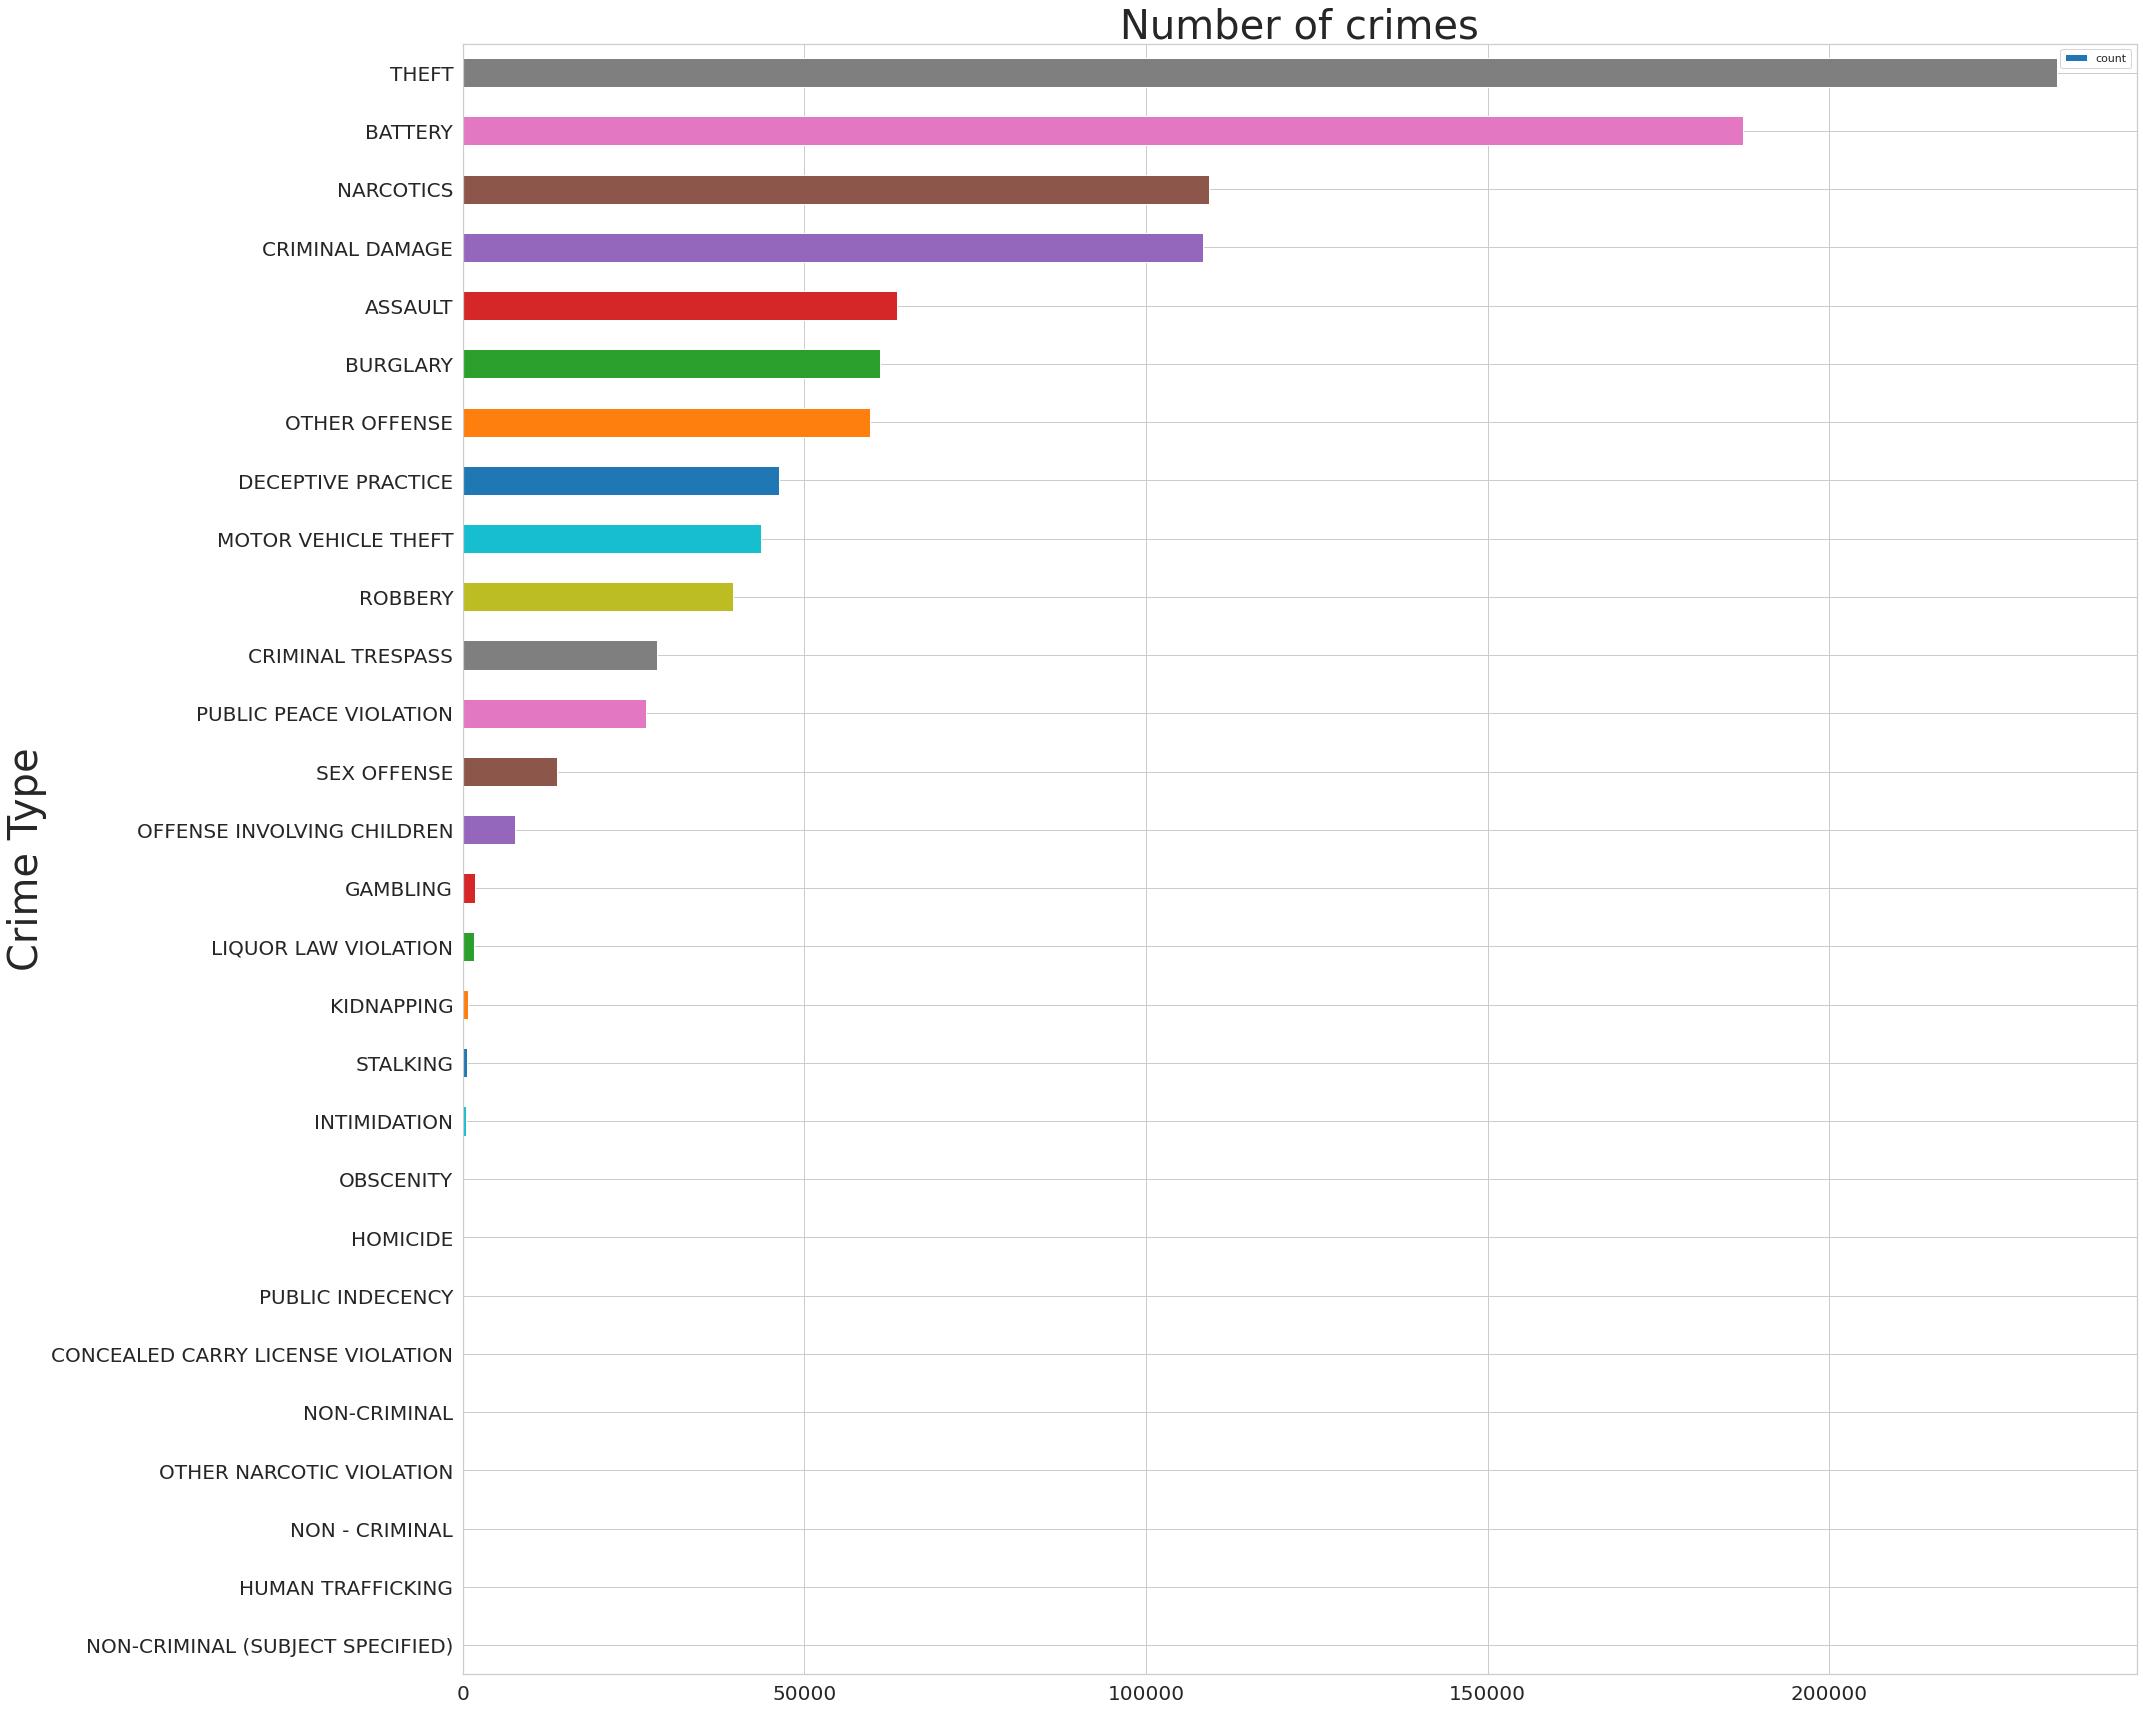

In [164]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

cleaned_df.groupBy("Primary Type")\
        .count().toPandas().sort_values(by='count')\
        .plot(x='Primary Type',y='count',\
                      sort_columns=True,kind='barh', \
                      figsize=(30, 30),fontsize=20,color=colors)
plt.title("Number of crimes", fontsize=40)
plt.ylabel('Crime Type', fontsize=40)

In [165]:
cleaned_df=cleaned_df.filter((cleaned_df['Primary Type']!='STALKING')&
                             (cleaned_df['Primary Type']!='OBSCENITY')&
                             (cleaned_df['Primary Type']!='NON-CRIMINAL (SUBJECT SPECIFIED)')&
                             (cleaned_df['Primary Type']!='GAMBLING')&
                             (cleaned_df['Primary Type']!='NON - CRIMINAL')&
                             (cleaned_df['Primary Type']!='LIQUOR LAW VIOLATION')&
                             (cleaned_df['Primary Type']!='PUBLIC INDECENCY')&
                             (cleaned_df['Primary Type']!='HUMAN TRAFFICKING')&
                             (cleaned_df['Primary Type']!='INTIMIDATION')&
                             (cleaned_df['Primary Type']!='CONCEALED CARRY LICENSE VIOLATION')&
                             (cleaned_df['Primary Type']!='NON-CRIMINAL')&
                             (cleaned_df['Primary Type']!='OTHER NARCOTIC VIOLATION'))

Text(0, 0.5, 'Crime Type')

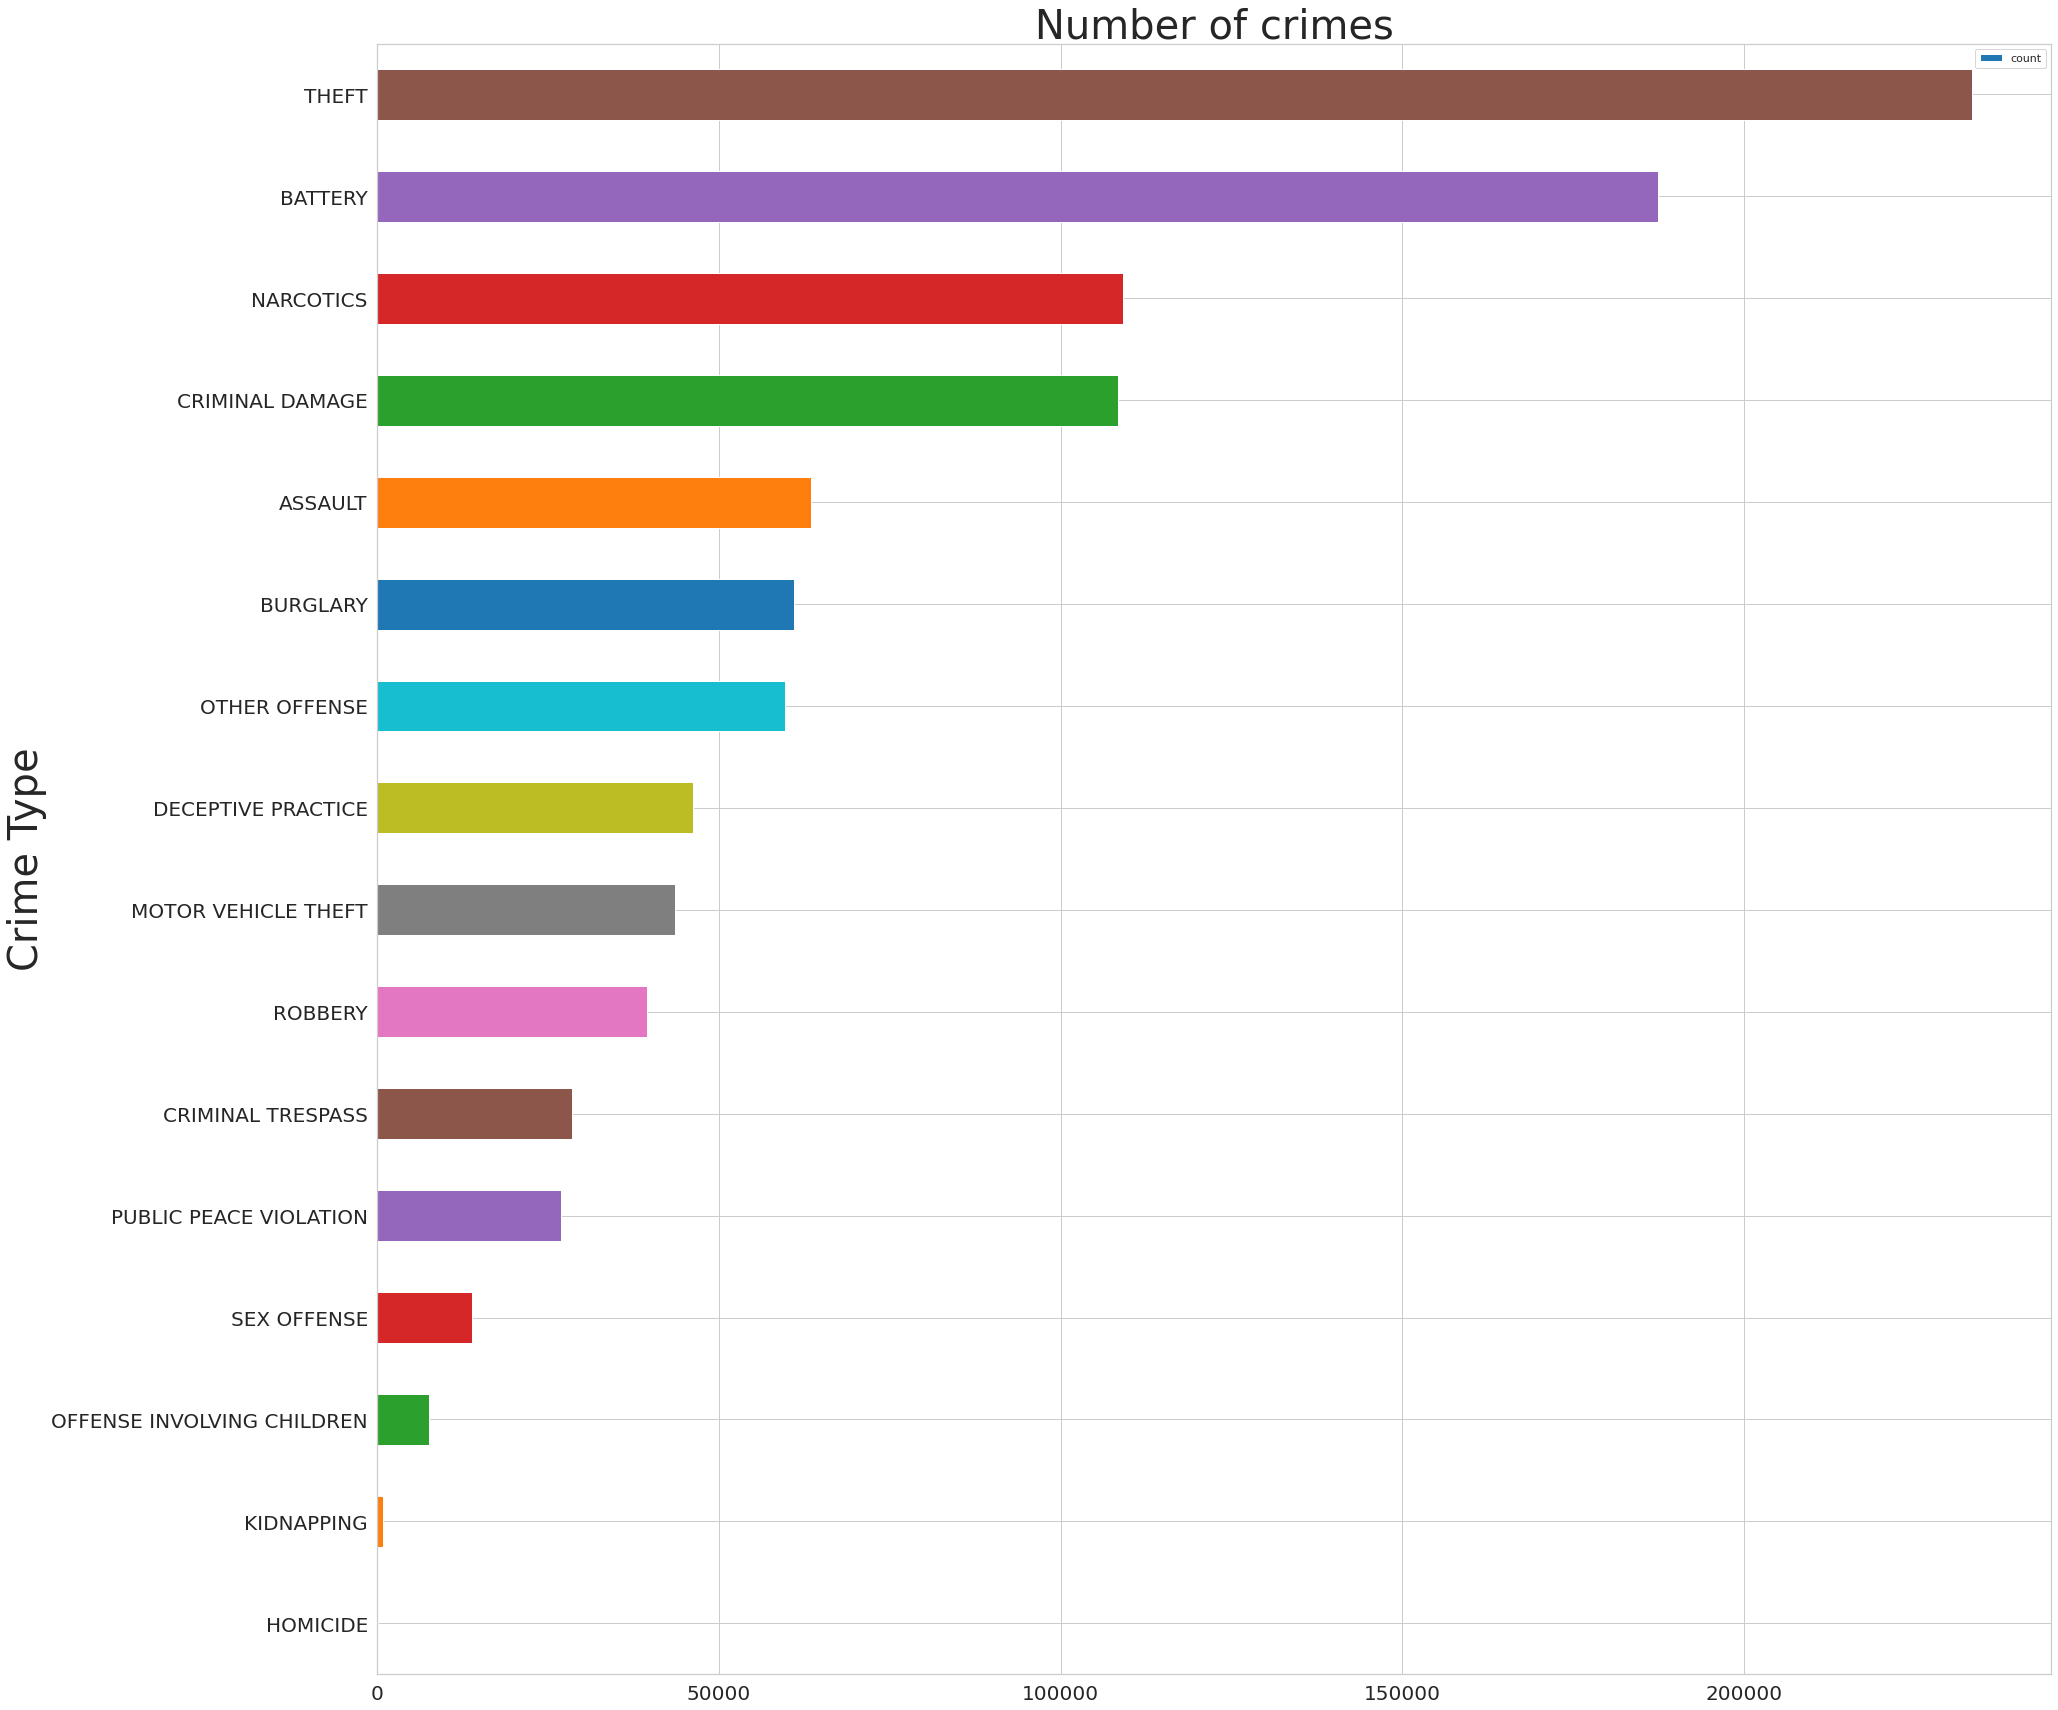

In [166]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

cleaned_df.groupBy("Primary Type")\
        .count().toPandas().sort_values(by='count')\
        .plot(x='Primary Type',y='count',\
                      sort_columns=True,kind='barh', \
                      figsize=(30, 30),fontsize=20,color=colors)
plt.title("Number of crimes", fontsize=40)
plt.ylabel('Crime Type', fontsize=40)

Text(0.5, 0, 'Block Name')

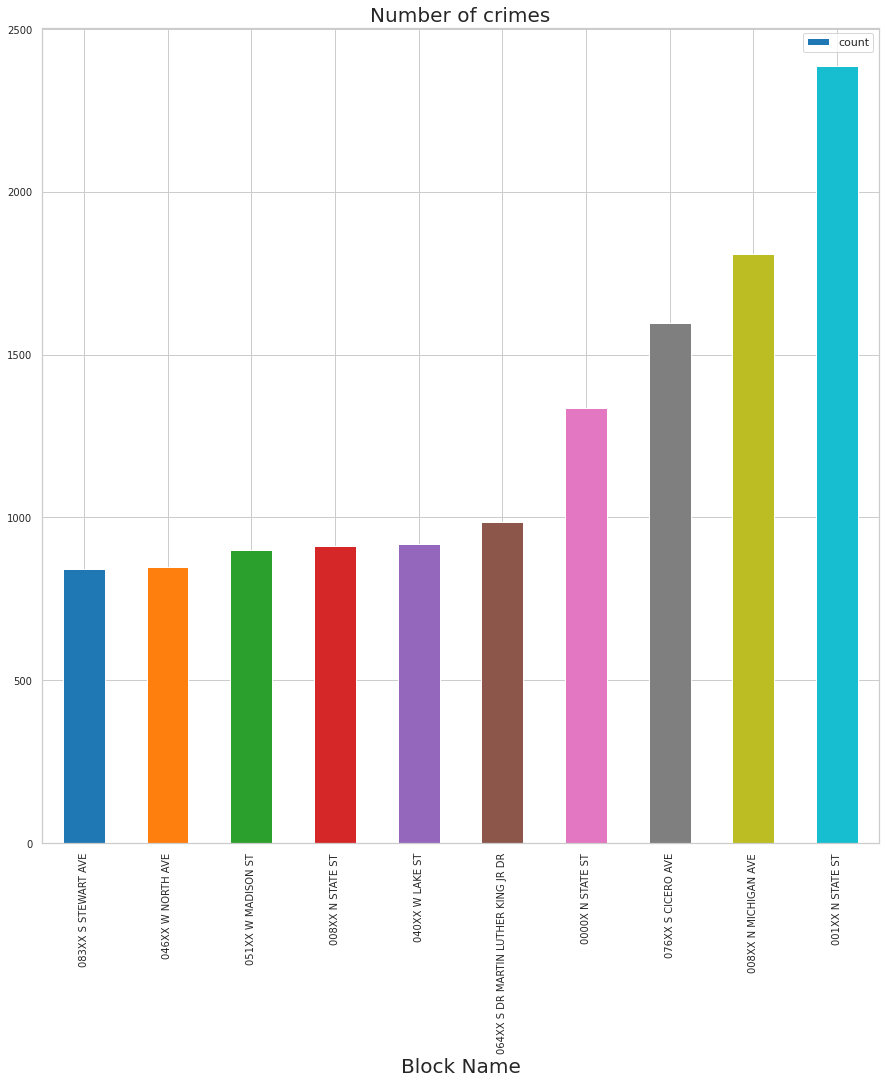

In [167]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

cleaned_df.groupBy("Block")\
        .count().sort('count', ascending=False).limit(10)\
        .toPandas().sort_values(by='count')\
        .plot(x='Block',y='count',\
         sort_columns=True,kind='bar', \
         figsize=(15, 15),fontsize=10,color=colors)
plt.title("Number of crimes", fontsize=20)
plt.xlabel('Block Name', fontsize=20)

In [168]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Using heat map to check hot spot of crimes.

In [169]:
import folium
from folium import plugins
from folium.plugins import HeatMap

latitude = 41.864073157
longitude = -87.706818608


heatMap = folium.Map(location=[latitude, longitude], 
                 tiles = "OpenStreetMap",
                zoom_start=12)
hotspot = cleaned_df.toPandas().head(20000)
heat_data = [[row['Latitude'],row['Longitude']] for index, row in hotspot.iterrows()]
HeatMap(heat_data, radius=10).add_to(heatMap)

heatMap

### Model

In [170]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler

# Define the input and output columns
inputCols = [ "Type_index", "Description_index", "Location_Description_index","Domestic_index"]
outputCol = "features"

# Create a vector assembler to combine the input columns into a single feature vector
assembler = VectorAssembler(inputCols=inputCols, outputCol=outputCol)

# Use the vector assembler to transform the data
data = assembler.transform(indexed)

# Split the data into training and test sets
(trainingData, testData) = data.randomSplit([0.8, 0.2])

# Define the random forest classifier model
rf = RandomForestClassifier(labelCol="Arrest_index", featuresCol=outputCol,maxBins = 500)

# Train the model on the training data
model = rf.fit(trainingData)

# Make predictions on the test data
predictions = model.transform(testData)

# Evaluate the model's performance
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator1 = MulticlassClassificationEvaluator(labelCol="Arrest_index", predictionCol="prediction", metricName="accuracy")
evaluator2 = MulticlassClassificationEvaluator(labelCol="Arrest_index", predictionCol="prediction", metricName="f1")

accuracy = evaluator1.evaluate(predictions)
f1 = evaluator2.evaluate(predictions)
print("accuracy = %g" % (accuracy))
print("f1 score = %g" % (f1))

accuracy = 0.857872
f1 score = 0.845344


In [178]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Create a vector assembler to combine the input features into a single vector
assembler = VectorAssembler(
    inputCols=["Type_index", "Description_index", "Location_Description_index","Domestic_index"],
    outputCol="features")

# Train/test split the dataset
train_data, test_data = indexed.randomSplit([0.8, 0.2], seed=42)

# Instantiate a Decision Tree classifier
dt = DecisionTreeClassifier(labelCol="Arrest_index", featuresCol="features",maxBins = 500)

# Chain the vector assembler and decision tree classifier into a single pipeline
pipeline = Pipeline(stages=[assembler, dt])

# Fit the pipeline on the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model's performance
evaluator1 = MulticlassClassificationEvaluator(labelCol="Arrest_index", metricName="accuracy")
accuracy = evaluator1.evaluate(predictions)
print("Accuracy: {:.4f}".format(accuracy))


evaluator = BinaryClassificationEvaluator(labelCol="Arrest_index")
auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print("Area under ROC curve = {:.4f}".format(auc))





Accuracy: 0.8717
Area under ROC curve = 0.6124


In [ ]:
### clustering 

In [179]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator


# Select relevant features for clustering
feature_cols = ["Latitude", "Longitude"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
cluster_data = assembler.transform(cleaned_df).select("features")

# Train a KMeans model
kmeans = KMeans(k=3, seed=42)
model = kmeans.fit(cluster_data)

# Make predictions on the data
predictions = model.transform(cluster_data)
predictions.show()

# Evaluate the clustering performance using silhouette score
evaluator = ClusteringEvaluator()
silhouette = evaluator.evaluate(predictions)
print("Silhouette score = {:.4f}".format(silhouette))




+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[41.9856058,-87.8...|         1|
|[41.80784952,-87....|         0|
|[41.90561751,-87....|         2|
|[41.80122344,-87....|         0|
|[41.83077342,-87....|         0|
|[41.95339895,-87....|         2|
|[41.88634498,-87....|         1|
|[41.88773158,-87....|         1|
|[41.86539947,-87....|         2|
|[41.97086437,-87....|         2|
|[41.81756525,-87....|         0|
|[41.87398492,-87....|         2|
|[41.78760093,-87....|         0|
|[41.81107466,-87....|         1|
|[41.70711216,-87....|         0|
|[41.92800146,-87....|         1|
|[41.90114072,-87....|         2|
|[41.75201902,-87....|         0|
|[41.75039691,-87....|         0|
|[41.79385617,-87....|         0|
+--------------------+----------+
only showing top 20 rows

Silhouette score = 0.6142


# The End